In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
import nltk
from nltk.corpus import stopwords

# Load data 
data = pd.read_csv("dataset1.csv")
text = data["text"]
labels = data["reviews"]  # Assuming the label column contains sentiment (positive/negative)


nltk.download('stopwords')

# Define negation words
negations = set(["not", "no", "never", "n't", "couldn't", "didn't", "wouldn't", "won't", "can't", "aren't"])

# Preprocess text data with negation handling
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove punctuation and special characters
    words = text.split()
    processed_words = []
    is_negated = False
    for word in words:
        if word in negations:
            is_negated = True
            continue
        if is_negated:
            word = "NOT_" + word
            is_negated = False
        processed_words.append(word)
    processed_text = " ".join(processed_words)
    return processed_text

# Train-Test Split for Training and Evaluation
X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.2, random_state=42)
preprocessed_train_text = X_train.apply(preprocess_text)
preprocessed_test_text = X_test.apply(preprocess_text)

# Train vectorizer
vectorizer = TfidfVectorizer(max_features=2000)
vectorizer.fit(preprocessed_train_text)

# Train model
model = LogisticRegression(solver="lbfgs", multi_class="multinomial")
model.fit(vectorizer.transform(preprocessed_train_text), y_train)

# Function to classify sentiment with negation handling
def classify_sentiment(text_to_classify, model, vectorizer):
    preprocessed_text = preprocess_text(text_to_classify)
    features = vectorizer.transform([preprocessed_text])
    prediction = model.predict(features)[0]
    return prediction

# Get user input for sentiment classification
while True:
    new_text = input("Enter a review to classify (or 'q' to quit): ")
    if new_text.lower() == 'q':
        break

    sentiment = classify_sentiment(new_text, model, vectorizer)
    print("Predicted sentiment:", sentiment)
    
    # Ensure vectorizer is trained (consider training on a separate set beforehand)
if not 'vectorizer' in globals():
    train_vectorizer(preprocessed_train_text)

# Transform test data using the trained vectorizer
test_features = vectorizer.transform(preprocessed_test_text)

# Predict labels for test data
predictions = model.predict(test_features)

# Compute accuracy
accuracy = accuracy_score(y_test, predictions)

# Compute precision
precision = precision_score(y_test, predictions, average='weighted')

# Compute recall\
recall = recall_score(y_test, predictions, average='weighted')

# Compute F1-score
f1 = f1_score(y_test, predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Predicted sentiment: positive
Accuracy: 0.8090692124105012
Precision: 0.8131841000740679
Recall: 0.8090692124105012
F1-score: 0.7458870676909363


In [3]:
data

,title,product,rating,text,rew_body,reviews
0,Powertron 72200 3.5 VOLT BATTERY FOR WELCH ALL...,Electronics,1,"While the battery arrived in a timely manner, ...",-0.4404,negative
1,AmazonBasics Ultra Thin Indoor HDTV Antenna,Electronics,4,Does a good job of pulling in 30+ channels. S...,0.8310,positive
2,Clip Plus 4 GB MP3 Player (Black),Electronics,5,The Sansa Clip + is just awesome. It has a re...,0.8553,positive
3,Bose UFS-20 Universal Floor Stands (pair),Electronics,5,Quality stands.,0.0000,neutral
4,Sony MDRZX100 Headphones,Electronics,3,"These were very good headphones for a while, b...",0.4848,positive
...,...,...,...,...,...,...
2090,"SweetLeaf SteviaTabs Sweetener, 100 Tabs",Grocery,3,Container is hard to open and close.,-0.1027,negative
2091,Garbanzo Beans,Grocery,5,HUMMUS!!!!!,0.0000,neutral
2092,SpressoLuxe Nespresso Compatible Gourmet Coffe...,Grocery,1,Smashed by the machine with each use. Coffee ...,0.4404,positive
2093,"Slap Ya Mama Cajun Seasoning Blend, Original, s",Grocery,5,Add a little or add a lot -- add it to almost ...,0.7840,positive


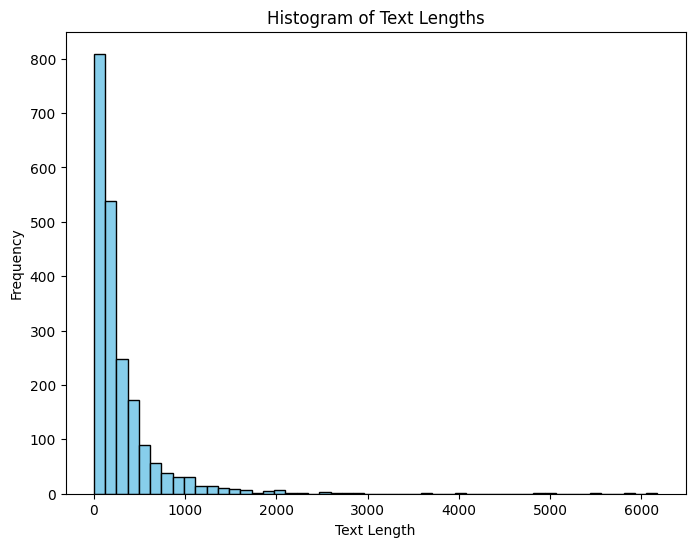

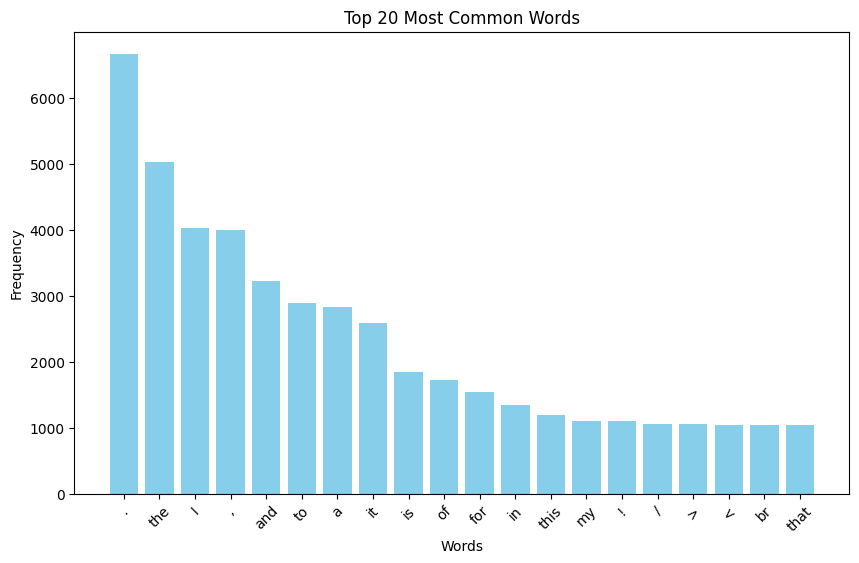

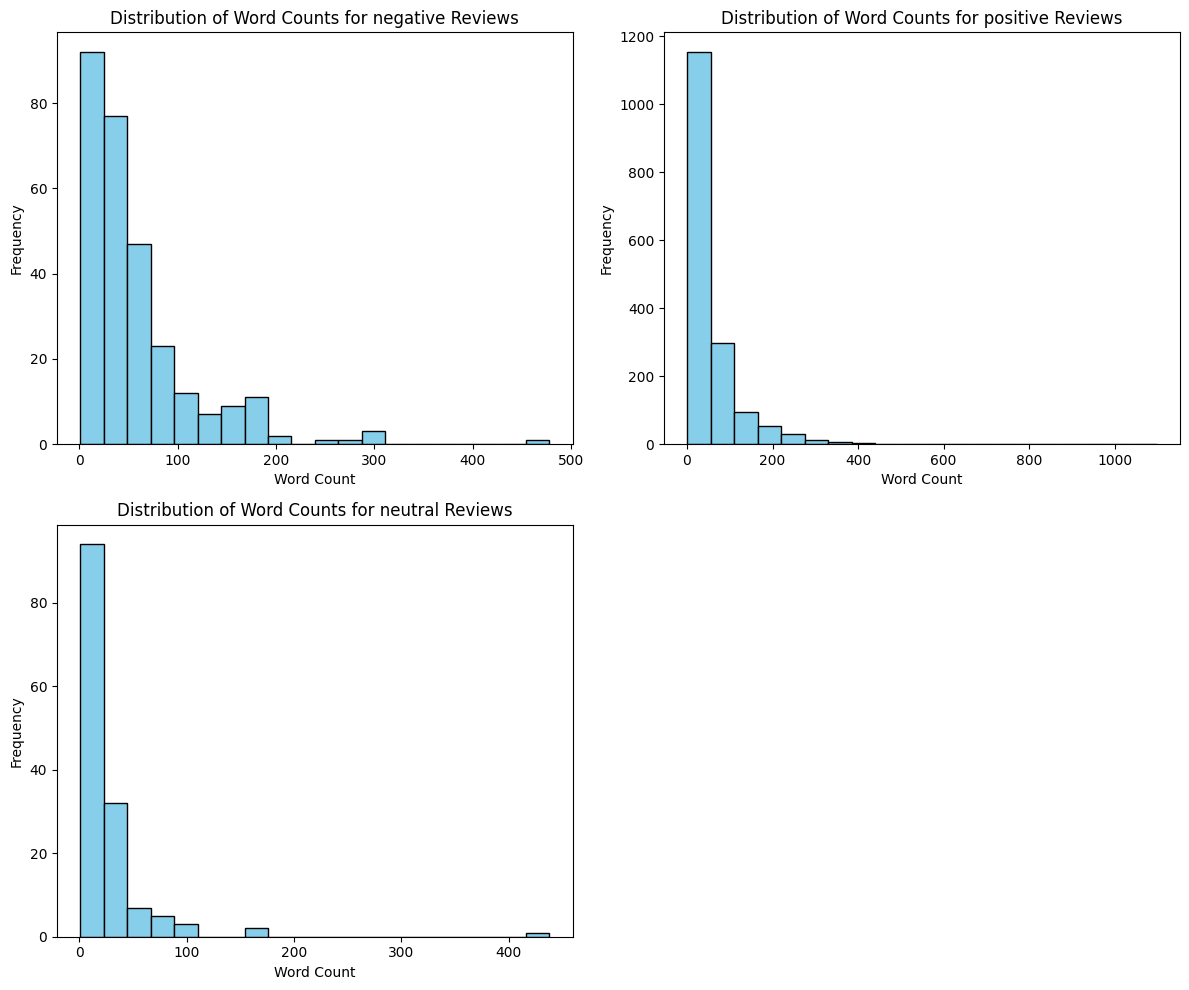

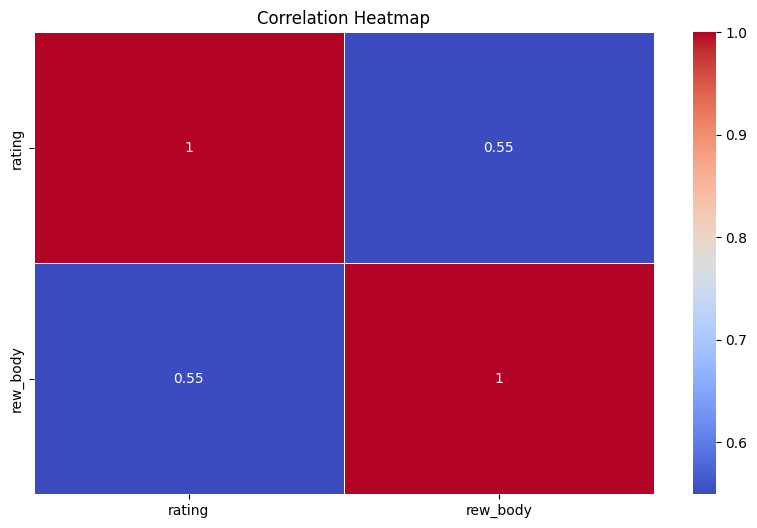

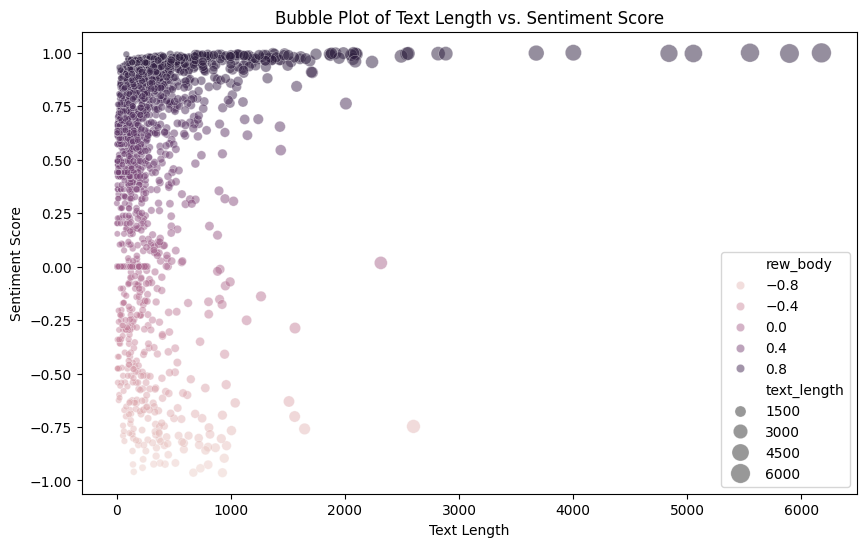

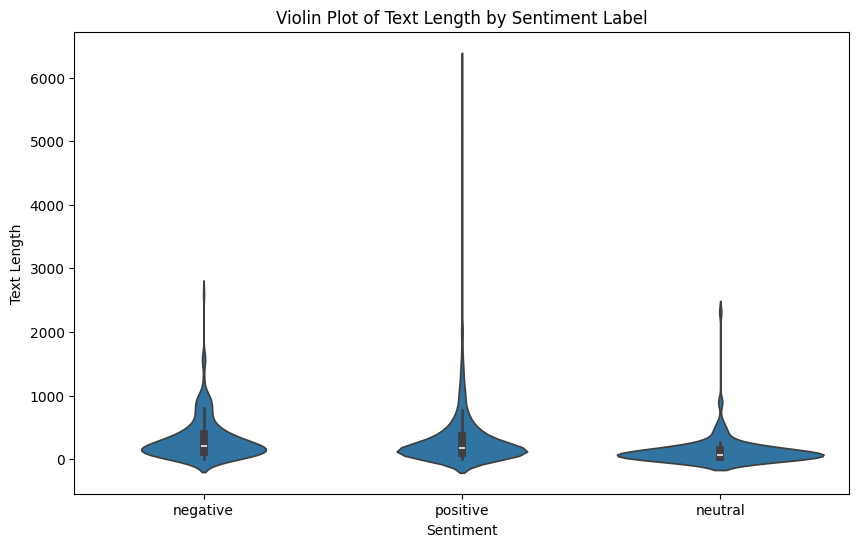

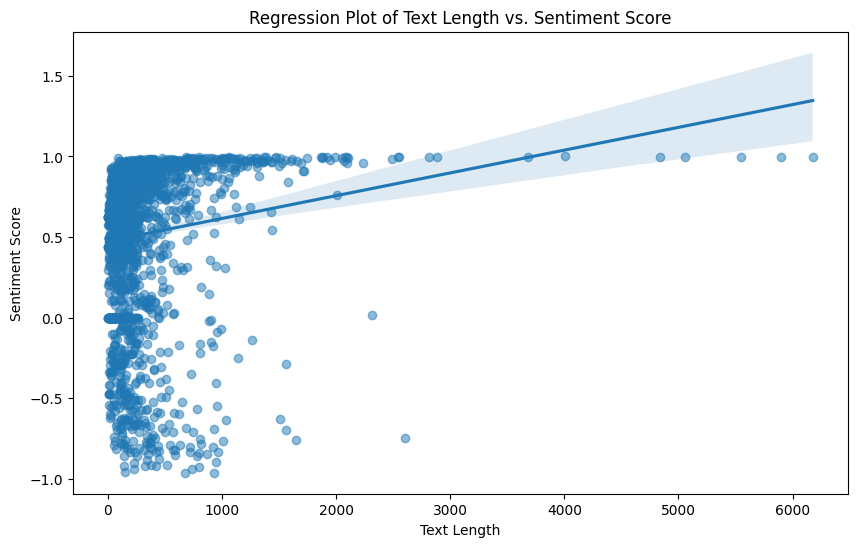

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import STOPWORDS

# Load data
data = pd.read_csv("dataset1.csv")

# Histogram of text lengths
text_lengths = data['text'].apply(len)
plt.figure(figsize=(8, 6))
plt.hist(text_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Bar plot of top N most common words
tokens = word_tokenize(" ".join(data['text']))
word_freq = Counter(tokens)
top_n = 20
top_words = dict(word_freq.most_common(top_n))
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.title(f'Top {top_n} Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Line chart of average text length over time (if applicable)
# Replace 'date_column' with your actual date column name
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data['text_length'] = data['text'].apply(len)
    avg_length_by_date = data.groupby('date')['text_length'].mean()
    plt.figure(figsize=(10, 6))
    avg_length_by_date.plot()
    plt.title('Average Text Length Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Text Length')
    plt.show()

# Subplots: Word Frequency by Sentiment Label
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sentiments = data['reviews'].unique()
num_plots = len(sentiments)
num_rows = 2
num_cols = 2

for i, sentiment in enumerate(sentiments):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    subset = data[data['reviews'] == sentiment]
    word_counts = subset['text'].str.split().apply(len)
    ax.hist(word_counts, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of Word Counts for {sentiment} Reviews')
    ax.set_xlabel('Word Count')
    ax.set_ylabel('Frequency')

# If there are extra subplots, hide them
for i in range(num_plots, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Filter out non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Calculate text length and add it to the DataFrame
data['text_length'] = data['text'].apply(len)

# Bubble Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='rew_body', hue='rew_body', size='text_length', data=data, sizes=(20, 200), alpha=0.5)
plt.title('Bubble Plot of Text Length vs. Sentiment Score')
plt.xlabel('Text Length')
plt.ylabel('Sentiment Score')
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='reviews', y='text_length', data=data)
plt.title('Violin Plot of Text Length by Sentiment Label')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()

# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='text_length', y='rew_body', data=data, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Text Length vs. Sentiment Score')
plt.xlabel('Text Length')
plt.ylabel('Sentiment Score')
plt.show()


In [4]:
data.isna().sum()

title       0
product     0
rating      0
text        0
rew_body    0
reviews     0
dtype: int64

In [5]:
data.describe()

,rating,rew_body
count,2095.000000,2095.000000
mean,4.104057,0.516129
std,1.349823,0.491432
min,1.000000,-0.963700
25%,4.000000,0.300650
50%,5.000000,0.690800
75%,5.000000,0.890000
max,5.000000,0.999700


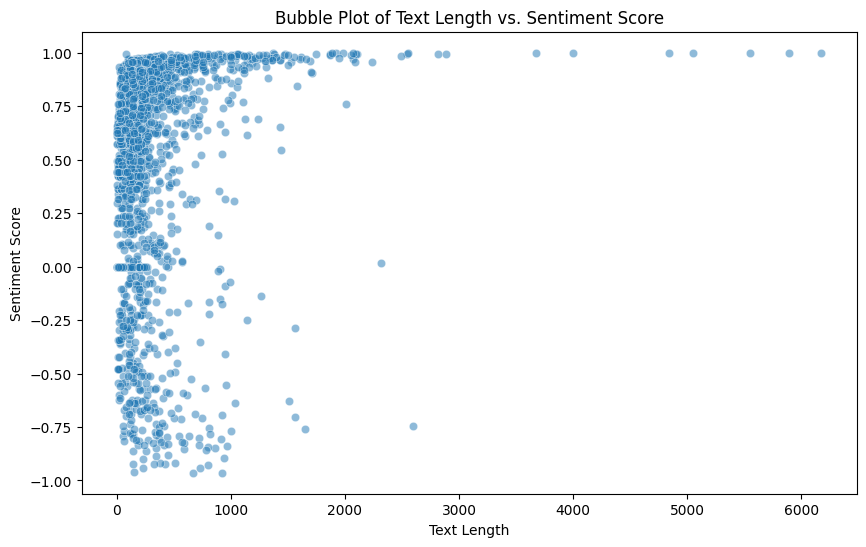

In [12]:
# Bubble Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='rew_body', data=data, alpha=0.5)
plt.title('Bubble Plot of Text Length vs. Sentiment Score')
plt.xlabel('Text Length')
plt.ylabel('Sentiment Score')
plt.show()

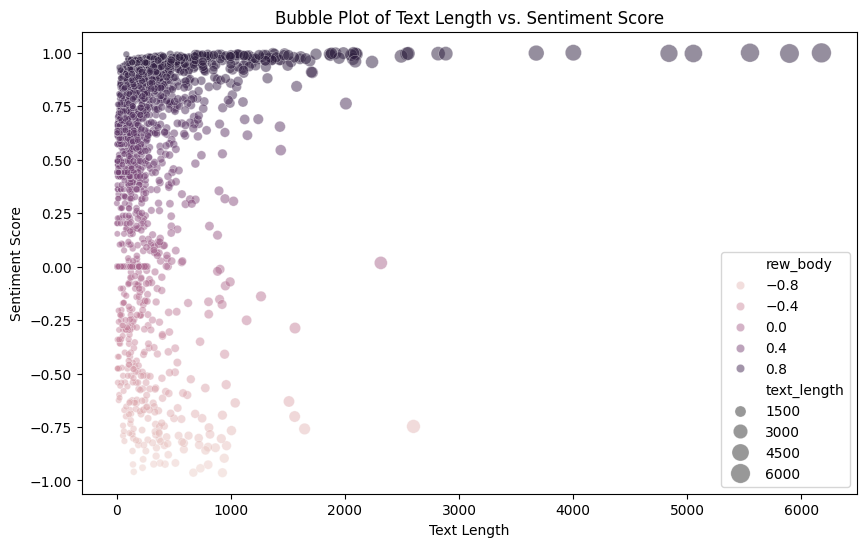

In [13]:
# Bubble Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='rew_body', hue='rew_body', size='text_length', data=data, sizes=(20, 200), alpha=0.5)
plt.title('Bubble Plot of Text Length vs. Sentiment Score')
plt.xlabel('Text Length')
plt.ylabel('Sentiment Score')
plt.show()

c:\Users\gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


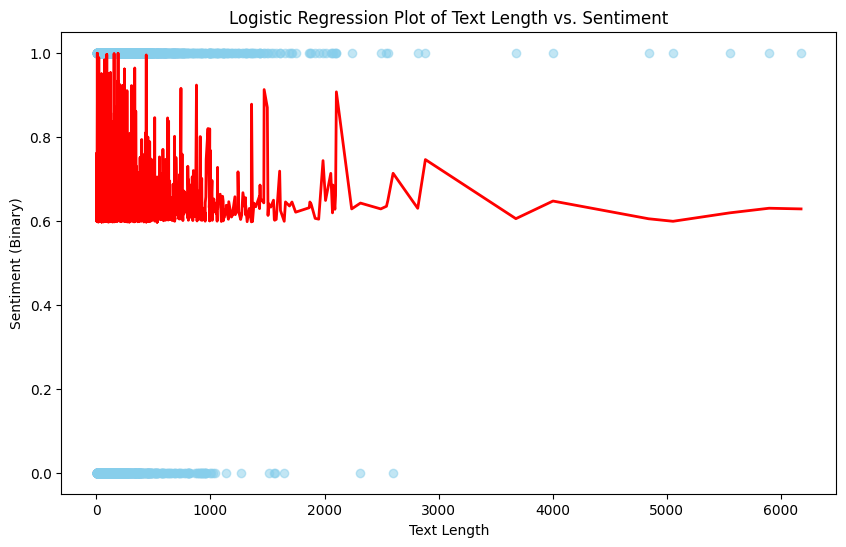

In [14]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Fit logistic regression model
model = LogisticRegression()
model.fit(data[['text_length']], data['sentiment'])

# Plot logistic regression decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(data['text_length'], data['sentiment'], color='skyblue', alpha=0.5)
plt.plot(np.sort(data['text_length']), model.predict_proba(np.sort(data[['text_length']]))[:, 1], color='red', linewidth=2)
plt.title('Logistic Regression Plot of Text Length vs. Sentiment')
plt.xlabel('Text Length')
plt.ylabel('Sentiment (Binary)')
plt.show()


In [2]:
import tkinter as tk
from tkinter import ttk, messagebox
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Global variable for text entry count
text_entry_count = 0

# Load data (replace with your data loading method)
data = pd.read_csv("dataset1.csv")

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

# Preprocess text data
data['text'] = data['text'].apply(preprocess_text)

# Train-Test Split for Training and Evaluation
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['reviews'], test_size=0.2, random_state=42)

# Train vectorizer
vectorizer = TfidfVectorizer(max_features=2000)
vectorizer.fit(X_train)

# Train model
model = LogisticRegression(solver="lbfgs", multi_class="multinomial")
model.fit(vectorizer.transform(X_train), y_train)

# Function to classify sentiment
def classify_sentiment(text_to_classify):
    text_to_classify = preprocess_text(text_to_classify)
    features = vectorizer.transform([text_to_classify])
    prediction = model.predict(features)[0]
    return prediction

# Function to display emojis based on sentiment
def display_emojis(sentiment):
    positive_emojis = ["😊", "😄", "😍", "🥰", "😎", "😇", "😉"]
    negative_emojis = ["😔", "😞", "😢", "😭"]
    return positive_emojis if sentiment == "positive" else negative_emojis

# Function to add a new text entry field
def add_text_entry():
    global text_entry_count  # Declare text_entry_count as global

    # Add new label for the text entry
    new_text_label = ttk.Label(scrollable_frame, text="Enter a review:")
    new_text_label.grid(row=text_entry_count * 2 + 2, column=0, padx=5, pady=5, sticky="w")

    # Add new text entry field
    new_text_entry = tk.Text(scrollable_frame, height=5, width=50)
    new_text_entry.grid(row=text_entry_count * 2 + 2, column=1, padx=5, pady=5)
    text_entry_list.append(new_text_entry)

    # Create labels for displaying review results, emojis, and feedback dynamically
    result_label = ttk.Label(scrollable_frame, text="", font=("Comic Sans MS", 12, "bold"))
    result_label.grid(row=text_entry_count * 2 + 2, column=2, pady=5, padx=10, sticky="w")
    result_labels.append(result_label)

    emoji_label = ttk.Label(scrollable_frame, text="", font=("Comic Sans MS", 20))
    emoji_label.grid(row=text_entry_count * 2 + 2, column=3, pady=5, padx=10, sticky="w")
    emoji_labels.append(emoji_label)

    feedback_label = ttk.Label(scrollable_frame, text="", font=("Comic Sans MS", 12))
    feedback_label.grid(row=text_entry_count * 2 + 2, column=4, pady=5, padx=10, sticky="w")
    feedback_labels.append(feedback_label)

    # Add classify and add review buttons below the new entry
    classify_button = ttk.Button(scrollable_frame, text="Classify Review", command=classify_reviews)
    classify_button.grid(row=text_entry_count * 2 + 3, column=0, pady=10, columnspan=2)

    add_entry_button = ttk.Button(scrollable_frame, text="Add Review", command=add_text_entry)
    add_entry_button.grid(row=text_entry_count * 2 + 3, column=2, pady=10, columnspan=3)

    text_entry_count += 1

# Function to classify reviews and display results
def classify_reviews():
    for idx, entry in enumerate(text_entry_list):
        text = entry.get("1.0", "end-1c")
        if text:
            # Classify sentiment
            sentiment = classify_sentiment(text)
            result_labels[idx].config(text="Predicted sentiment: " + sentiment)
            # Display emojis based on sentiment
            emojis = display_emojis(sentiment)
            emoji_labels[idx].config(text=" ".join(emojis))
            # Provide feedback based on sentiment
            feedback_text = "Great! Keep it up! 😊" if sentiment == "positive" else "Hmm... Needs improvement. 😔"
            feedback_color = "green" if sentiment == "positive" else "red"
            feedback_labels[idx].config(text=feedback_text, foreground=feedback_color)
        else:
            result_labels[idx].config(text="Please enter a review.")
            messagebox.showwarning("Empty Review", "Please enter a review.")

root = tk.Tk()
root.title("Review Classification")

# Center the window on the screen
root.update_idletasks()
width = root.winfo_width()
height = root.winfo_height()
x = (root.winfo_screenwidth() // 2) - (width // 2)
y = (root.winfo_screenheight() // 2) - (height // 2)
root.geometry('{}x{}+{}+{}'.format(width, height, x, y))

# Create themed style for the GUI
style = ttk.Style()
style.theme_use("clam")  # Choose a theme (you can try different themes like "clam", "alt", "default", etc.)
style.configure(".", font=("Comic Sans MS", 12), foreground="#333")  # Set font and foreground color for all widgets
style.configure("TButton", padding=10, background="#ff6b81", foreground="#fff")  # Button style
style.map("TButton", background=[("active", "#ff4757")])  # Button hover color
style.configure("TLabel", padding=10, background="#fff8e7")  # Label style
style.configure("TFrame", background="#fff8e7")  # Frame style

# Create a main frame and canvas for scrolling
main_frame = ttk.Frame(root)
main_frame.pack(fill=tk.BOTH, expand=True, padx=20, pady=20)

canvas = tk.Canvas(main_frame)
canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

scrollbar = ttk.Scrollbar(main_frame, orient=tk.VERTICAL, command=canvas.yview)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

scrollable_frame = ttk.Frame(canvas)
canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")

scrollable_frame.bind(
    "<Configure>",
    lambda e: canvas.configure(
        scrollregion=canvas.bbox("all")
    )
)

# Create and place widgets
text_entry_list = []

# Labels and text entry fields for the first review
text_label = ttk.Label(scrollable_frame, text="Enter a review:")
text_label.grid(row=0, column=0, padx=5, pady=5, sticky="w")

text_entry = tk.Text(scrollable_frame, height=5, width=50)
text_entry.grid(row=0, column=1, padx=5, pady=5)
text_entry_list.append(text_entry)

# Create labels for displaying review results, emojis, and feedback
result_labels = []
emoji_labels = []
feedback_labels = []

# Initialize the first set of labels
result_label = ttk.Label(scrollable_frame, text="", font=("Comic Sans MS", 12, "bold"))
result_label.grid(row=0, column=2, pady=5, padx=10, sticky="w")
result_labels.append(result_label)

emoji_label = ttk.Label(scrollable_frame, text="", font=("Comic Sans MS", 20))
emoji_label.grid(row=0, column=3, pady=5, padx=10, sticky="w")
emoji_labels.append(emoji_label)

feedback_label = ttk.Label(scrollable_frame, text="", font=("Comic Sans MS", 12))
feedback_label.grid(row=0, column=4, pady=5, padx=10, sticky="w")
feedback_labels.append(feedback_label)

# Add initial classify and add review buttons below the first entry
classify_button = ttk.Button(scrollable_frame, text="Classify Review", command=classify_reviews)
classify_button.grid(row=1, column=0, pady=10, columnspan=2)

add_entry_button = ttk.Button(scrollable_frame, text="Add Review", command=add_text_entry)
add_entry_button.grid(row=1, column=2, pady=10, columnspan=3)

root.mainloop()
